# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

O objetivo deste exercicío é simular um modelo real de previsão de renda e se o cliente é um bom ou mau pagador, iremos utilizar a metodologia CRISP-DM para montar o projeto.


## Etapa 2 Crisp-DM: Entendimento dos dados

A base de dados utilizada neste projeto foi disponibilizada pela EBAC no Modulo 10 do curso de ciencia de dados.

### Dicionário de dados




| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis         | object|
| id_cliente              |  Codigo identificador do cliente                                   |int|
| sexo                    |  Sexo do cliente                                      | object|
| posse_de_veiculo        |  Indica se o cliente possui veículo                                      | bool|
| posse_de_imovel         |  Indica se o cliente possui imóvel                                      | bool|
| qtd_filhos              |  Quantidade de filhos do cliente                                      | int|
| tipo_renda              |  Tipo de renda do cliente                                      | object|
| educacao                |  Grau de instrução do cliente                                      | object|
| estado_civil            |  Estado civil do cliente                                      | object|
| tipo_residencia         |  Tipo de residência do cliente (própria, alugada etc)                                     | object|
| idade                   |  Idade do cliente                                    | int|
| tempo_emprego           |  Tempo no emprego atual                                     | float|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência                                      | float|
| renda                   |  Indica se o cliente é mau pagador                                      | float|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import tree


%matplotlib inline


In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [42]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




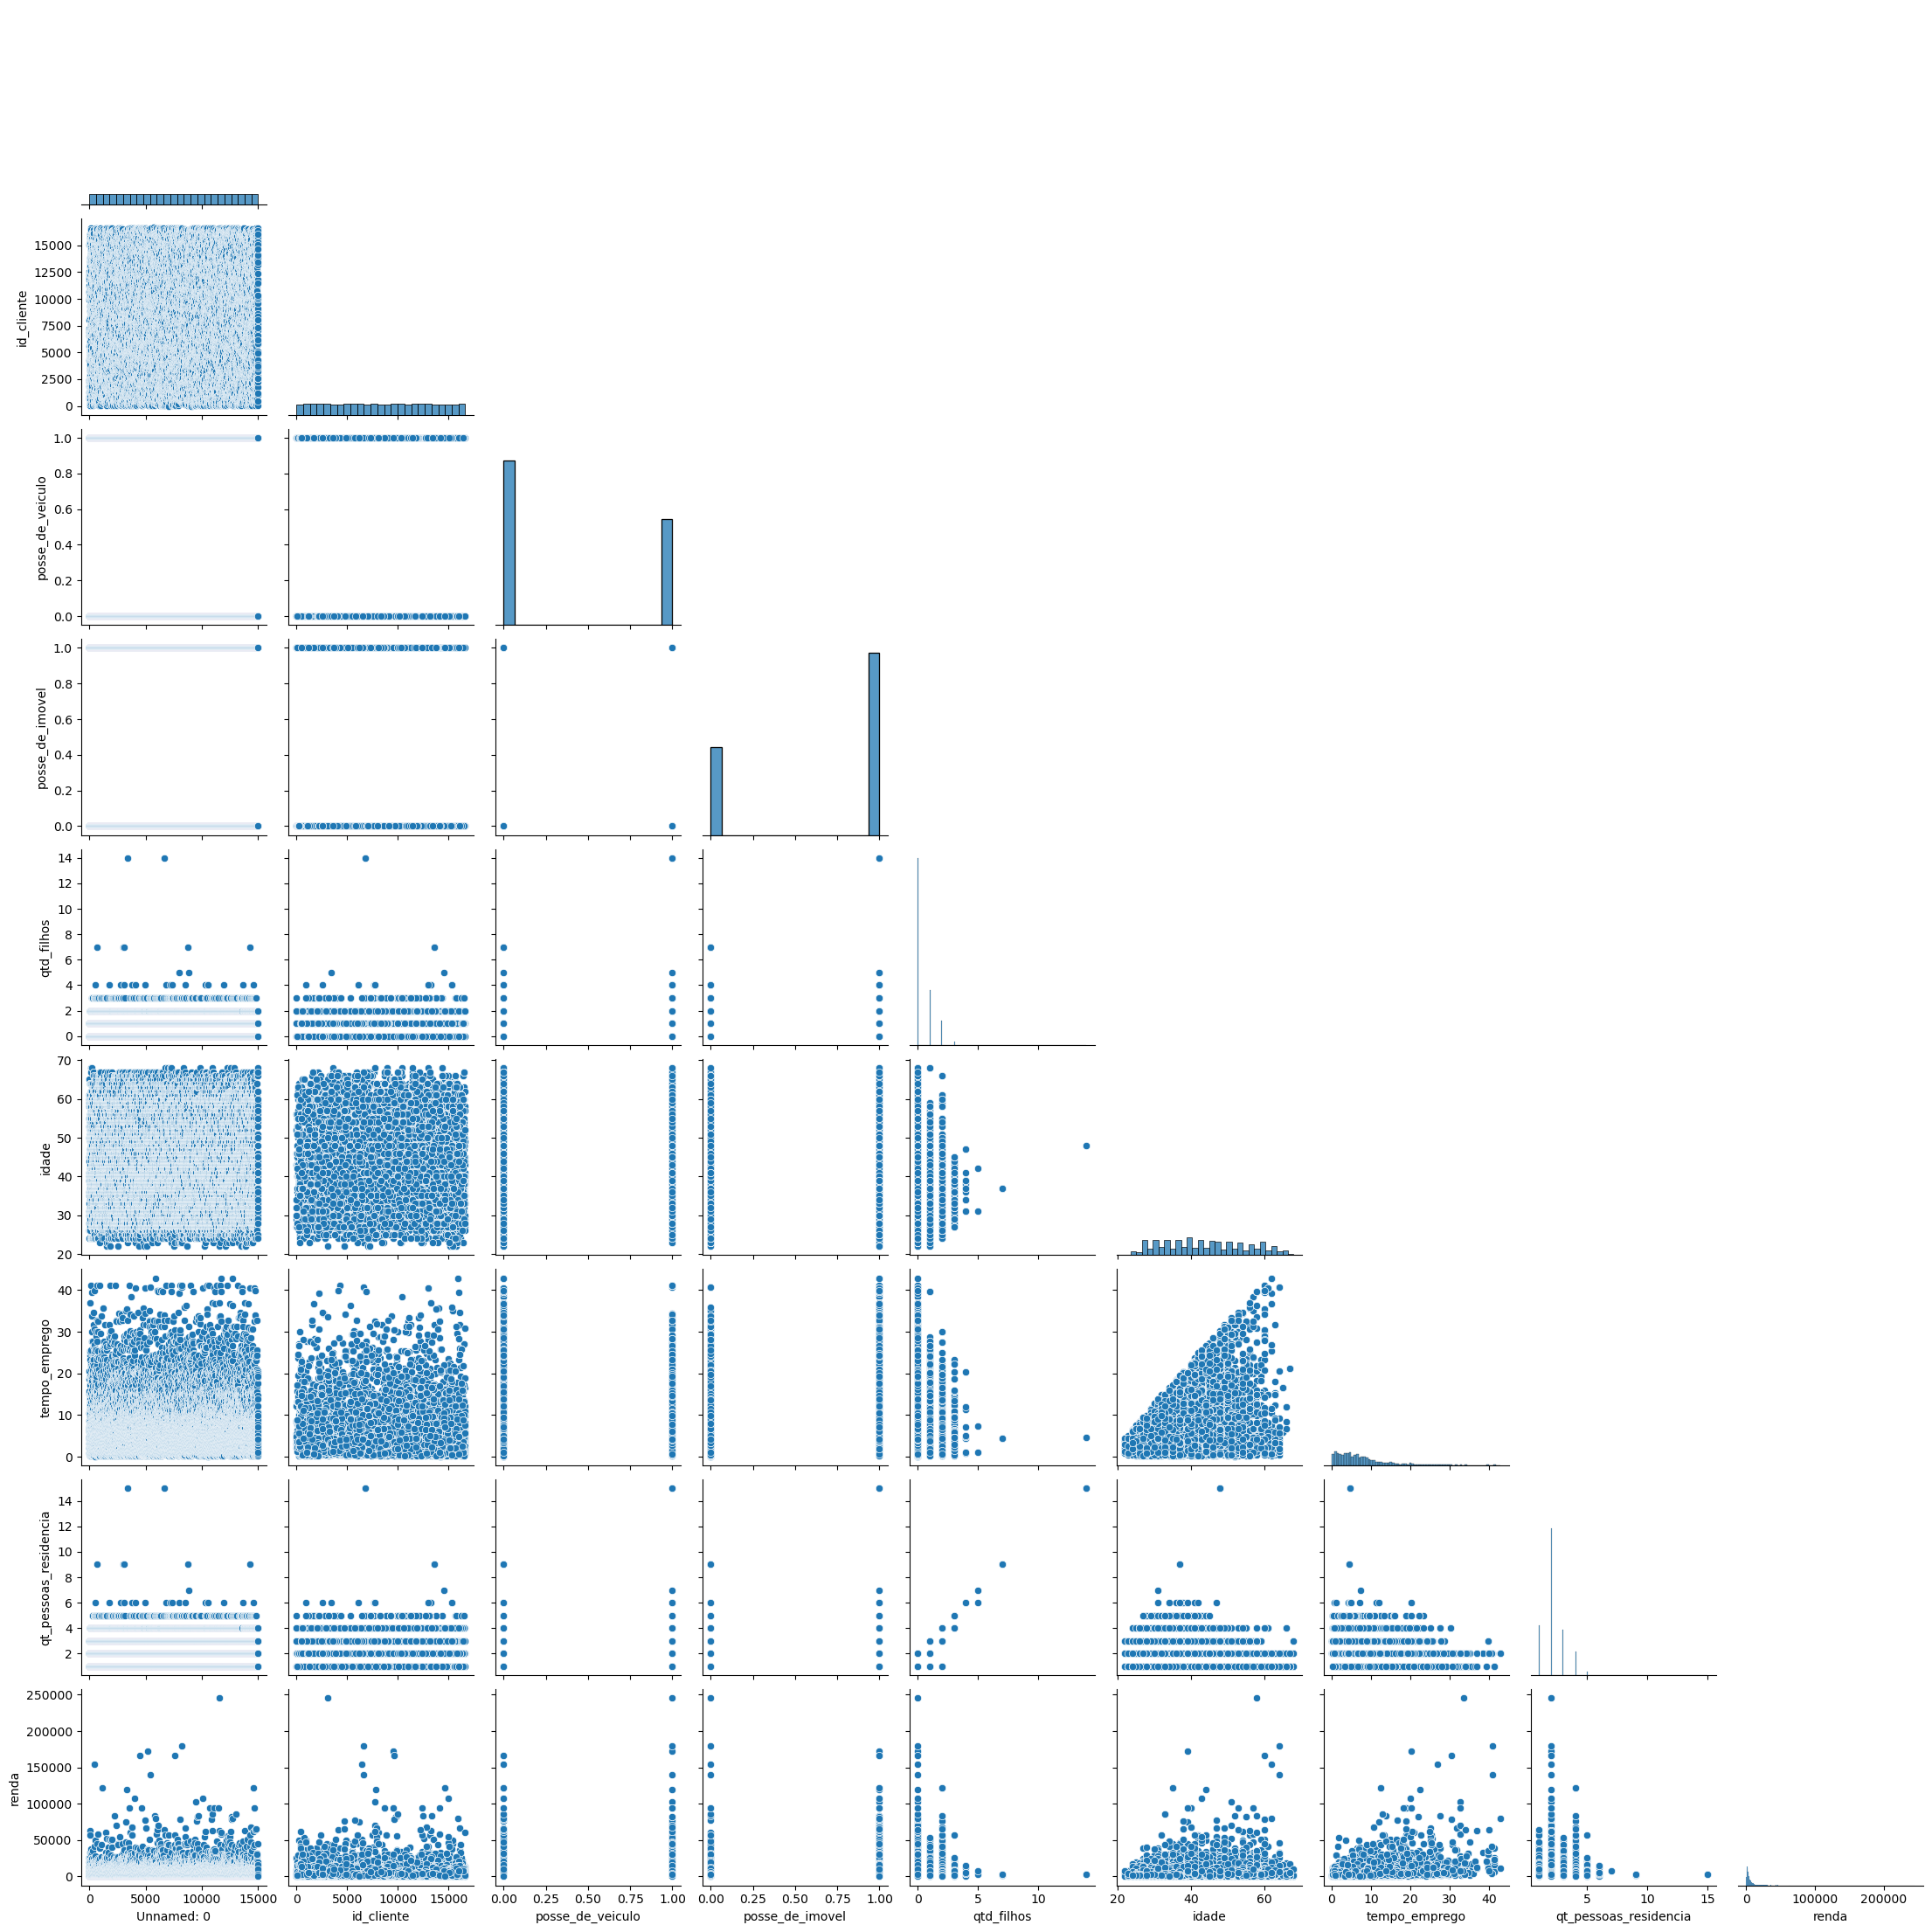

In [5]:
sns.pairplot(data=renda, corner=True)
plt.show()

Utilizando a biblioteca Seaborn conseguimos gerar gráficos bivariados de todas as variáveis

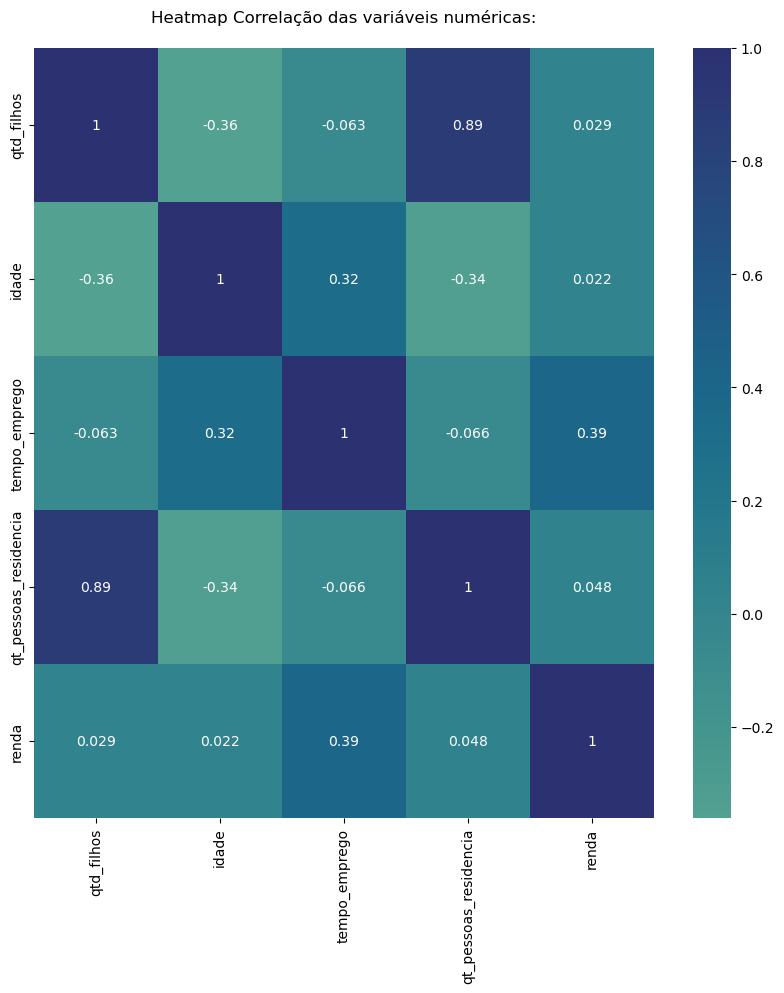

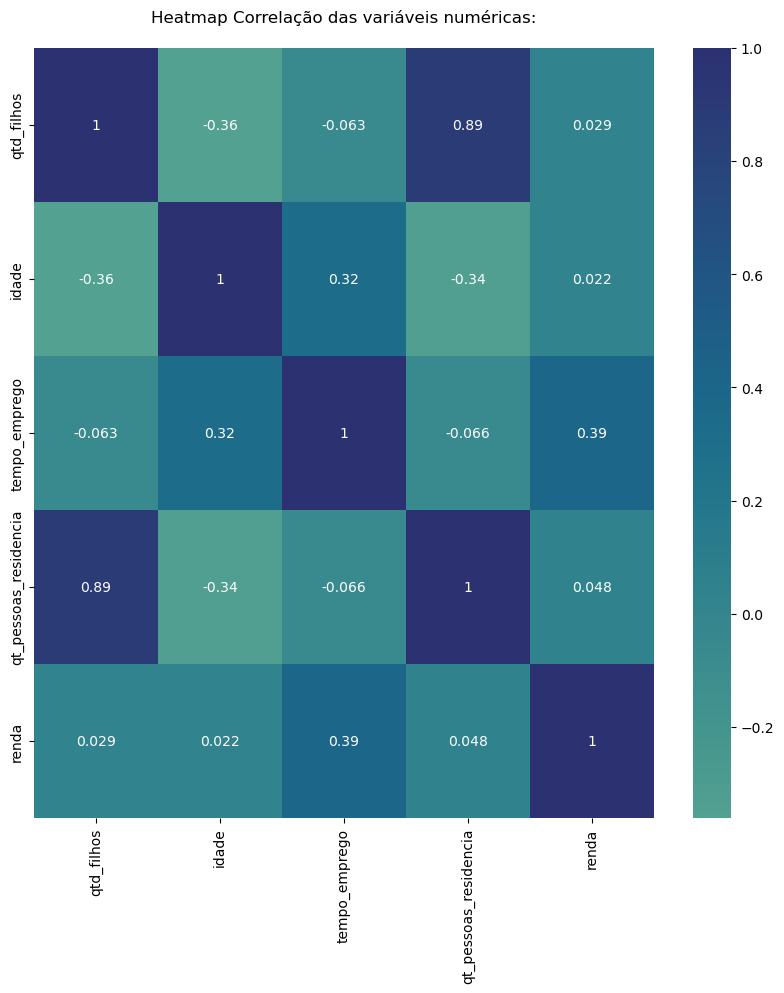

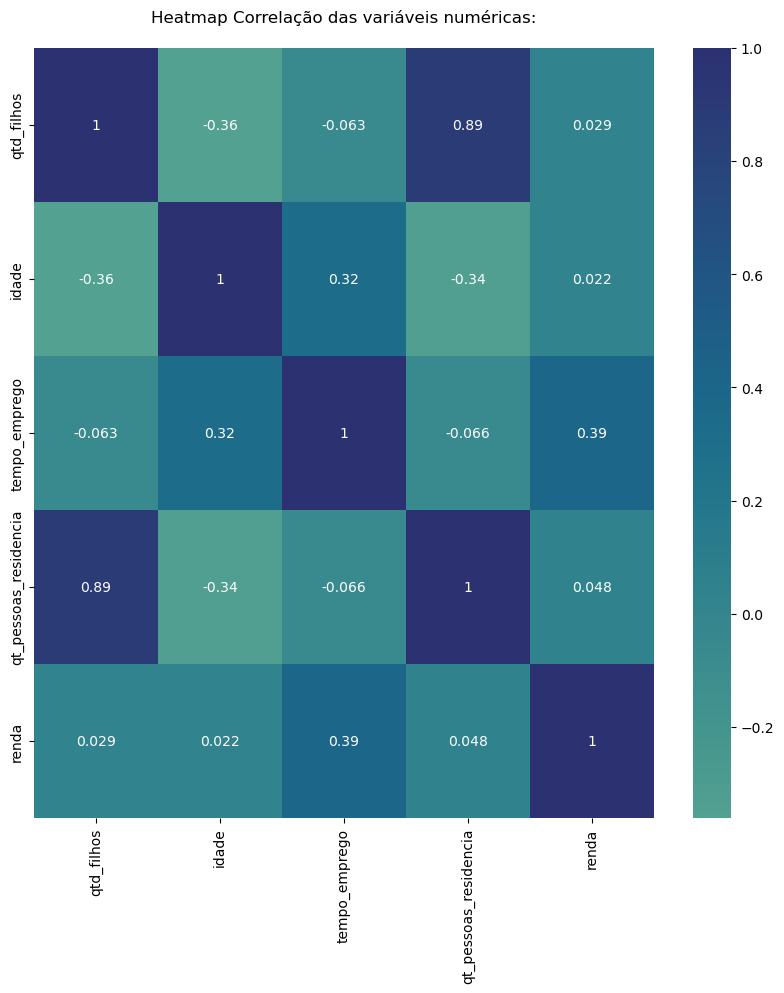

In [8]:
renda_num = list(renda.select_dtypes('number'))
plt.figure(figsize=(10,10))
plt.title('Heatmap Correlação das variáveis numéricas:\n')
sns.heatmap(renda[renda_num].drop(['Unnamed: 0', 'id_cliente'], axis=1).corr(),
               annot=True, 
               center = 0, 
               cmap='crest')
renda[renda_num].drop(['Unnamed: 0', 'id_cliente'], axis=1).corr( )
plt.show()


Dentre as variáveis numéricas tempo_emprego é a que apresenta maior correlação com a variável alvo, a renda.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?

In [9]:
renda.drop(columns=['data_ref', 'id_cliente'], axis=1, inplace=True)

In [10]:
renda.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [40]:
#Verificando se há dados faltantes em nossa base de dados, podemos verificar que não há
renda.isna().value_counts()

Unnamed: 0  id_cliente  posse_de_veiculo  posse_de_imovel  qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia  renda  data_ref_2015-01-01  data_ref_2015-02-01  data_ref_2015-03-01  data_ref_2015-04-01  data_ref_2015-05-01  data_ref_2015-06-01  data_ref_2015-07-01  data_ref_2015-08-01  data_ref_2015-09-01  data_ref_2015-10-01  data_ref_2015-11-01  data_ref_2015-12-01  data_ref_2016-01-01  data_ref_2016-02-01  data_ref_2016-03-01  sexo_F  sexo_M  tipo_renda_Assalariado  tipo_renda_Bolsista  tipo_renda_Empresário  tipo_renda_Pensionista  tipo_renda_Servidor público  educacao_Primário  educacao_Pós graduação  educacao_Secundário  educacao_Superior completo  educacao_Superior incompleto  estado_civil_Casado  estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  estado_civil_Viúvo  tipo_residencia_Aluguel  tipo_residencia_Casa  tipo_residencia_Com os pais  tipo_residencia_Comunitário  tipo_residencia_Estúdio  tipo_residencia_Governamental
False       False       False       

In [11]:
renda['sexo'] = renda['sexo'].map({'M': 1, 'F': 0})
renda_dummies = pd.get_dummies(renda, dtype=int)
renda_dummies[['posse_de_veiculo', 'posse_de_imovel']] = renda_dummies[['posse_de_veiculo', 'posse_de_imovel']].astype(int)

In [18]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     15000 non-null  int64  
 1   sexo                           15000 non-null  int64  
 2   posse_de_veiculo               15000 non-null  bool   
 3   posse_de_imovel                15000 non-null  bool   
 4   qtd_filhos                     15000 non-null  int64  
 5   idade                          15000 non-null  int64  
 6   tempo_emprego                  12427 non-null  float64
 7   qt_pessoas_residencia          15000 non-null  float64
 8   renda                          15000 non-null  float64
 9   tipo_renda_Assalariado         15000 non-null  bool   
 10  tipo_renda_Bolsista            15000 non-null  bool   
 11  tipo_renda_Empresário          15000 non-null  bool   
 12  tipo_renda_Pensionista         15000 non-null 

In [16]:
#transformando as colunas de objeto em variáveis dummies
renda = pd.get_dummies(renda, columns=renda.select_dtypes(include='object').columns, dummy_na=False)

In [17]:
renda.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,tipo_renda_Assalariado,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,0,False,True,0,26,6.602740,1.0,8060.34,False,...,False,True,False,False,False,True,False,False,False,False
1,1,1,True,True,0,28,7.183562,2.0,1852.15,True,...,False,False,False,False,False,True,False,False,False,False
2,2,0,True,True,0,35,0.838356,2.0,2253.89,False,...,False,False,False,False,False,True,False,False,False,False
3,3,0,False,True,1,30,4.846575,3.0,6600.77,False,...,False,False,False,False,False,True,False,False,False,False
4,4,1,True,False,0,33,4.293151,1.0,6475.97,True,...,False,True,False,False,False,False,False,False,False,True


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


In [25]:
X = renda.drop(['renda'], axis=1).copy()
y= renda['renda']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [27]:
modelo_1 = RandomForestRegressor(max_depth=2)
modelo_2 = RandomForestRegressor(max_depth=8)

modelo_1.fit(X_train, y_train)
modelo_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=8)

In [28]:
mse1 = modelo_1.score(X_test, y_test)
mse2 = modelo_2.score(X_test, y_test)

print(f'O mse do modelo 1 é {mse1}')
print(f'O mse do modelo 2 é {mse2}')

O mse do modelo 1 é 0.3247703790353422
O mse do modelo 2 é 0.4141856286981763


In [29]:
modelo_2 = RandomForestRegressor (max_depth=8, min_samples_leaf=20)
modelo_2.fit(X_train, y_train) 
mse1 = modelo_2.score(X_test, y_test)
mse1

0.3697799192657991

In [39]:
renda_r2 = pd.DataFrame({'r2': r2s, 'profundidade': i_indicador, 'n_minimo': j_indicador})
sns.heatmap(renda_r2.pivot(index='profundidade',
            columns='n_minimo', values='r2'))
renda_r2.pivot(index='profundidade', columns='n_minimo', values='r2')

n_minimo,1,2,3,4,5,6,7,8
profundidade,,,,,,,,
1,0.144051,0.144051,0.144051,0.144051,0.144051,0.144051,0.144051,0.144051
2,0.330041,0.329693,0.329693,0.329693,0.329693,0.329693,0.329693,0.329693
3,0.348397,0.348571,0.348328,0.344908,0.344265,0.343308,0.342113,0.341418
4,0.355204,0.348405,0.348175,0.339479,0.337197,0.335994,0.333061,0.333492
5,0.376550,0.370600,0.368974,0.356090,0.347742,0.343777,0.342163,0.343369
6,0.391524,0.383357,0.380017,0.362853,0.356466,0.352050,0.349529,0.350625
7,0.394903,0.385531,0.382258,0.367273,0.359098,0.352238,0.350049,0.353390
8,0.398893,0.391168,0.389050,0.373159,0.363598,0.355733,0.353233,0.357300


In [35]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
}

# Crie o modelo
rf = RandomForestRegressor(max_depth = 7, min_samples_leaf=7, random_state=42)

# Realize o grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_
print(best_model)

RandomForestRegressor(max_depth=7, min_samples_leaf=7, n_estimators=400,
                      random_state=42)


In [36]:
modelo_final = RandomForestRegressor(max_depth = 7, min_samples_leaf=7, n_estimators=500, random_state=42)

modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)

## Etapa 5 Crisp-DM: Avaliação dos resultados


No modelo apresentado, foi necessário retirar os outliers e substituir pelo desvio padrão da coluna respectiva na qual havia o outlier, foi feito todo o processo de limpeza e remoção de linhas duplicadas e transformar todas as variaveis categorias em 'dummies'. Após isso, começamos a treinar o modelo usando random forest e com ajustes de alguns parammetros, conseguimos no melhor modelo possível para esse conjunto de daos, no qual um r² de 39%

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [37]:
mse = mean_squared_error(y_test, y_pred)
mse

31211882.503570087

In [38]:
r2_train = modelo_final.score(X_train, y_train)
r2_test = modelo_final.score(X_test, y_test)

print(r2_train)
print(r2_test)

0.5573973791635712
0.36302398249670886
